**Pokemon Wrangling Using Python**<br>
Let's catch 'em all

First, we import some (most used and useful) libraries<br>We can initialize the name using `as` to simply call the module

In [1]:
import numpy as np # numpy is a library for linear algebra
import pandas as pd # pandas is for data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # for generating pseudo-random numbers
import datetime, pytz # for manipulating dates and times
import io # provides the Python interfaces to stream handling
import requests # allows you to send organic, grass-fed HTTP/1.1 requests
import seaborn as sb # visualization library based on matplotlib
import matplotlib as mpl # famous 2D plotting library
import matplotlib.pyplot as plp 
import sklearn # implements machine learning, preprocessing, cross-validation and visualization algorithms
import sqlite3 # performs SQL on Python

**Data Import**

We can read the data using Pandas

In [2]:
poke = pd.read_csv('../input/Pokemon.csv')

Use `head` method to preview the data

In [3]:
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Description of each column

**#**: ID for each pokemon<br>
**Name**: Name of each pokemon<br>
**Type 1**: Each pokemon has a type, this determines weakness/resistance to attacks<br>
**Type 2**: Some pokemon are dual type and have 2<br>
**Total**: sum of all stats that come after this, a general guide to how strong a pokemon is<br>
**HP**: hit points, or health, defines how much damage a pokemon can withstand before fainting<br>
**Attack**: the base modifier for normal attacks (eg. Scratch, Punch)<br>
**Defense**: the base damage resistance against normal attacks<br>
**SP Atk**: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)<br>
**SP Def**: the base damage resistance against special attacks<br>
**Speed**: determines which pokemon attacks first each round<br>

Lets see the summary statistics, excluding NaN values by using `describe` method

In [4]:
poke.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Lets crunch the numbers, see how many pokemons for each type and visualize the proportion using `matplotlib`

In [5]:
poke["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

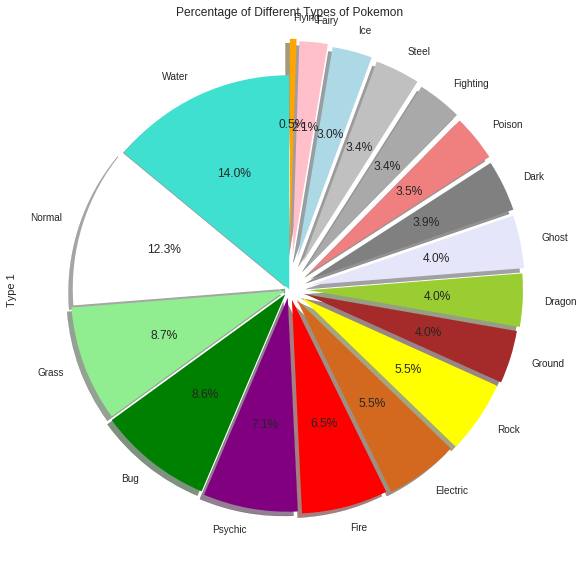

In [6]:
types = poke['Type 1']
colors = ['turquoise','white','lightgreen','green','purple','red','chocolate','yellow','brown','yellowgreen'
          ,'lavender','grey','lightcoral','darkgrey','silver','lightblue','pink','orange']
explode = np.arange(len(types.unique())) * 0.01

types.value_counts().plot.pie(
    explode=explode,
    colors=colors,
    title="Percentage of Different Types of Pokemon",
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    figsize=(8,8)
)
plp.tight_layout()

Let's see the pattern between attack/defense and legendary/non legendary<br>
Visualization using `seaborn`

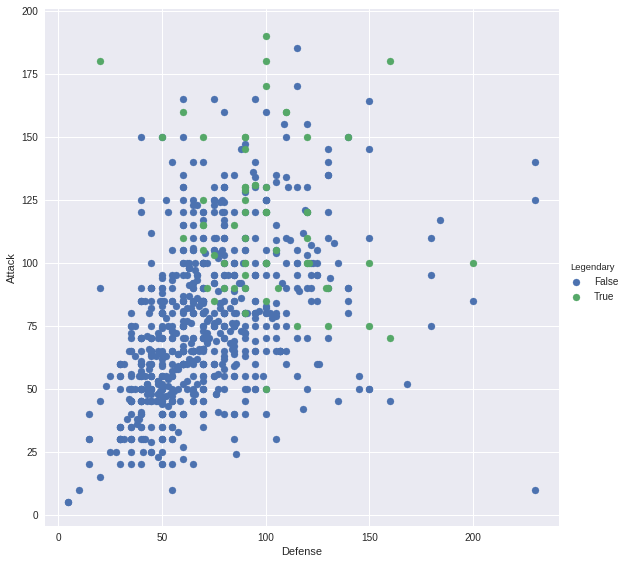

In [7]:
sb.FacetGrid(poke, hue="Legendary", size=8) \
   .map(plp.scatter, "Defense", "Attack") \
   .add_legend()

We can see the average HP of each type, Dragon ftw

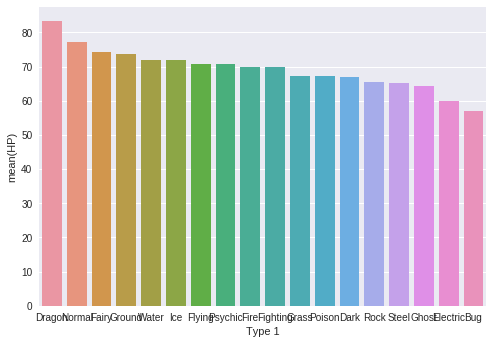

In [8]:
typehp = poke[['Type 1', 'HP']].groupby(['Type 1'], as_index=False).mean().sort_values(by='HP', ascending=False)
sb.barplot(x='Type 1', y='HP', data=typehp)

SQL sounds fun, let's connect to SQL

In [9]:
c = sqlite3.connect(':memory:')
pd.read_csv('../input/Pokemon.csv').to_sql('poke',c)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:1201: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


For the starter, let's query on the biggest and smallest HP Pokemon

In [10]:
pd.read_sql("SELECT Name, `Type 1`, max(HP) FROM poke", c)

,Name,Type 1,max(HP)
0,Blissey,Normal,255


In [11]:
pd.read_sql("SELECT Name, `Type 1`, min(HP) FROM poke", c)

,Name,Type 1,min(HP)
0,Shedinja,Bug,1


Top 5 Legendary and Non Legendary Pokemon Based on Total

In [12]:
pd.read_sql("SELECT Name, [Type 1], [Type 2], Total, HP, Attack, Defense, Speed, [Sp. Atk], [Sp. Def], Legendary, Generation FROM poke WHERE Legendary = '1' ORDER BY 4 DESC LIMIT 5", c)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Speed,Sp. Atk,Sp. Def,Legendary,Generation
0,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,130,154,100,1,1
1,MewtwoMega Mewtwo Y,Psychic,None,780,106,150,70,140,194,120,1,1
2,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,115,180,100,1,3
3,KyogrePrimal Kyogre,Water,None,770,100,150,90,90,180,160,1,3
4,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,90,150,90,1,3


In [13]:
pd.read_sql("SELECT Name, [Type 1], [Type 2], Total, HP, Attack, Defense, Speed, [Sp. Atk], [Sp. Def], Legendary, Generation FROM poke WHERE Legendary = '0' ORDER BY 4 DESC LIMIT 5", c)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Speed,Sp. Atk,Sp. Def,Legendary,Generation
0,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,71,95,120,0,2
1,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,120,90,0,3
2,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,110,105,110,0,3
3,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,92,120,95,0,4
4,Slaking,Normal,None,670,150,160,100,100,95,65,0,3


Top 5 Legendary and Non Legendary Pokemon Based on HP

In [14]:
pd.read_sql("SELECT Name, [Type 1], [Type 2], Total, HP, Attack, Defense, Speed, [Sp. Atk], [Sp. Def], Legendary, Generation FROM poke WHERE Legendary = '1' ORDER BY 5 DESC LIMIT 5", c)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Speed,Sp. Atk,Sp. Def,Legendary,Generation
0,GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,90,100,120,1,4
1,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,90,120,100,1,4
2,Xerneas,Fairy,None,680,126,131,95,99,131,98,1,6
3,Yveltal,Dark,Flying,680,126,131,95,99,131,98,1,6
4,Kyurem,Dragon,Ice,660,125,130,90,95,130,90,1,5


In [15]:
pd.read_sql("SELECT Name, [Type 1], [Type 2], Total, HP, Attack, Defense, Speed, [Sp. Atk], [Sp. Def], Legendary, Generation FROM poke WHERE Legendary = '0' ORDER BY 5 DESC LIMIT 5", c)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Speed,Sp. Atk,Sp. Def,Legendary,Generation
0,Blissey,Normal,None,540,255,10,10,55,75,135,0,2
1,Chansey,Normal,None,450,250,5,5,50,35,105,0,1
2,Wobbuffet,Psychic,None,405,190,33,58,33,33,58,0,2
3,Wailord,Water,None,500,170,90,45,60,90,45,0,3
4,Alomomola,Water,None,470,165,75,80,65,40,45,0,5


Statistics of Types

In [16]:
pd.read_sql("SELECT [Type 1], avg(HP), avg(Attack), avg(Defense), avg(Speed), max(HP), min(HP), count(Name) FROM poke GROUP BY 1 ORDER BY 2 DESC", c)

,Type 1,avg(HP),avg(Attack),avg(Defense),avg(Speed),max(HP),min(HP),count(Name)
0,Dragon,83.312500,112.125000,86.375000,83.031250,125,41,32
1,Normal,77.275510,73.469388,59.846939,71.551020,255,30,98
2,Fairy,74.117647,61.529412,65.705882,48.588235,126,35,17
3,Ground,73.781250,95.750000,84.843750,63.906250,115,10,32
4,Water,72.062500,74.151786,72.946429,65.964286,170,20,112
5,Ice,72.000000,72.750000,71.416667,63.458333,110,36,24
6,Flying,70.750000,78.750000,66.250000,102.500000,85,40,4
7,Psychic,70.631579,71.456140,67.684211,81.491228,190,20,57
8,Fire,69.903846,84.769231,67.769231,74.442308,115,38,52
9,Fighting,69.851852,96.777778,65.925926,66.074074,144,30,27


Number of Pokemon of each generation

In [17]:
pd.read_sql("SELECT Generation, count(Name) FROM poke GROUP BY 1", c)

,Generation,count(Name)
0,1,166
1,2,106
2,3,160
3,4,121
4,5,165
5,6,82


I'm not done yet, I'll be back to analyze the fun asap :) Thanks!<br>
brb leveling up my Primarina, Gengar and Lucario